In [22]:
from typing import Final

from darts import TimeSeries

# グラフを横長にする
from matplotlib.pylab import rcParams
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = 15, 6

In [8]:
DATA_PATH: Final[str] = "./data/monthly-car-sales.csv"

<Axes: xlabel='Month'>

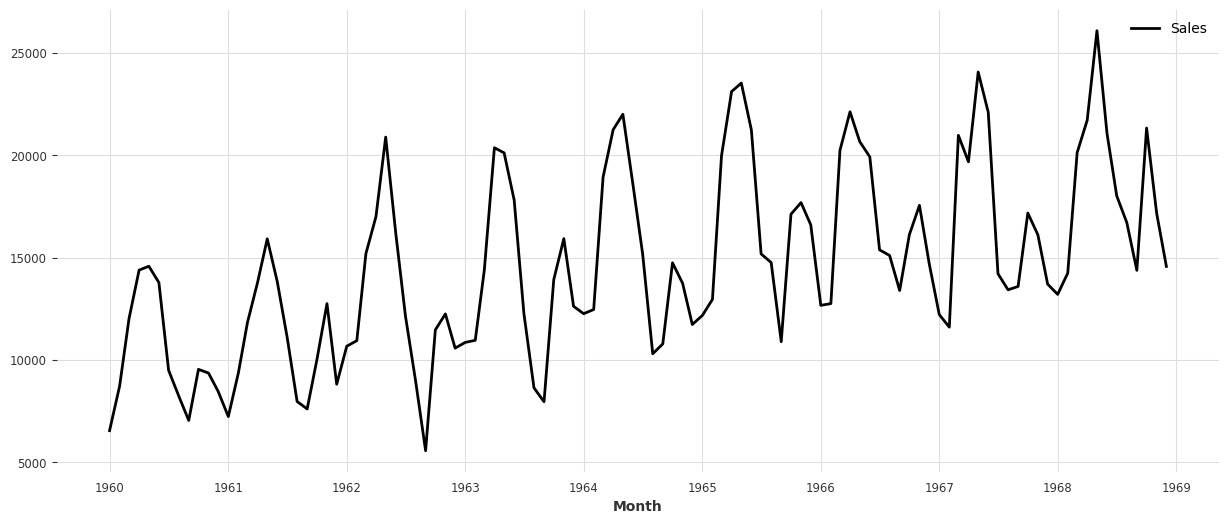

In [9]:
# pandasのDataFrameからでも読み込み可能
series = TimeSeries.from_csv(DATA_PATH, "Month", "Sales")
series.plot()

In [12]:
from darts.models import ( ARIMA,
                          ExponentialSmoothing
                          )

In [17]:
# 学習データと予測データの分割
train_size = int((len(series))*0.9)
train, val = series[:train_size], series[train_size:]

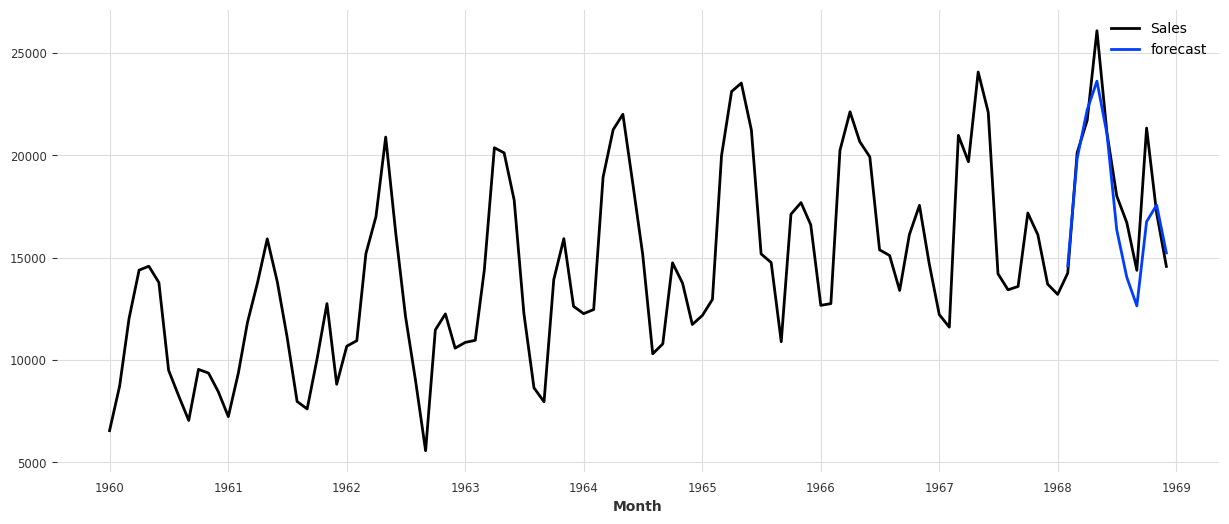

In [24]:
# ExponentialSmoothing
exponetial = ExponentialSmoothing()
exponetial.fit(train)
exponetial_pred = exponetial.predict(len(val))

series.plot()
exponetial_pred.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

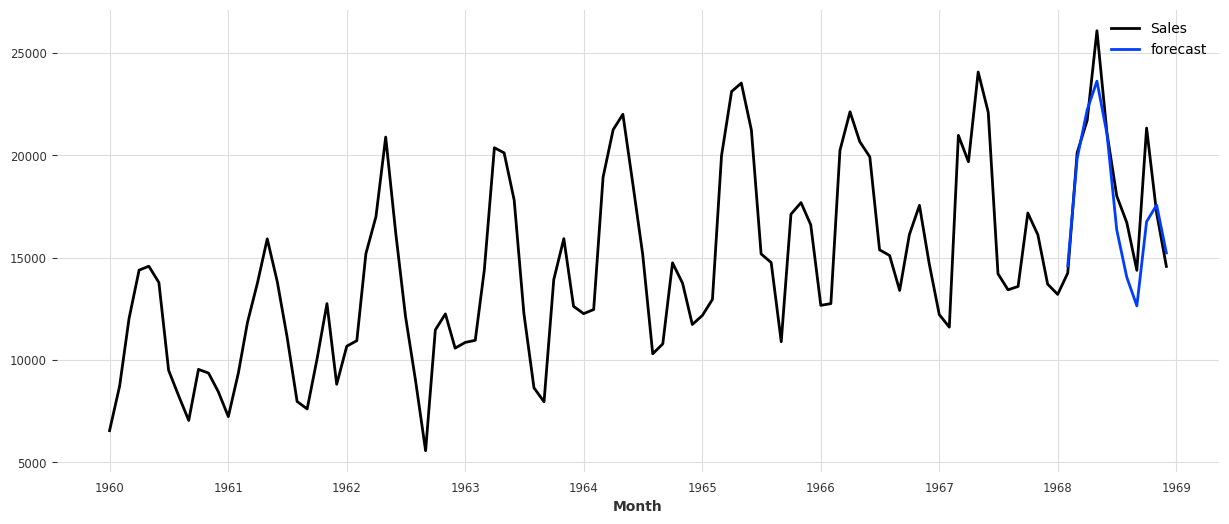

In [25]:
# ARIMA
arima = ARIMA()
arima.fit(train)
arima_perd = arima.predict(len(val))

series.plot()
exponetial_pred.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()